In [3]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import signal, integrate
import matplotlib.pyplot as plt
import os, math
from bearing.bearingdata import CWRUData, XJTUData
from bearing.db import Database
from bearing.noisefiltering import frenquecy_synchronous_average as fsa
from bearing.faultdiagnosis import data_filter, demodulate
%matplotlib inline

In [4]:
bearing_data = XJTUData().data[0]
data_array = []
for i in range(100, 110):
    data = bearing_data[i].load_data().V
    data_array.append(data)
data = fsa(data_array)

In [6]:
def demodulate_data(data):
    filtered_data = data_filter(data, 800, 8, "hp", 25600)
    return demodulate(filtered_data, 25600)
import time

1657618497.6569178
1657618497.67592


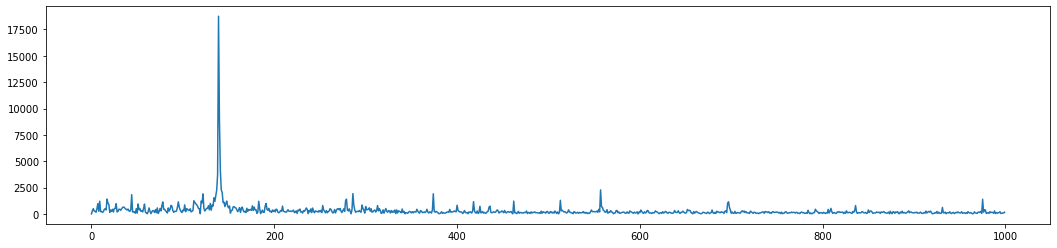

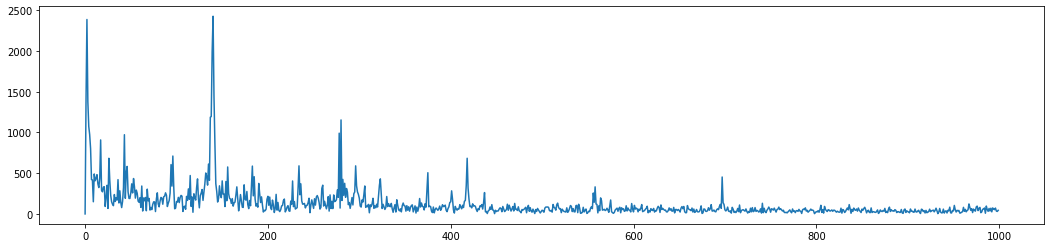

In [8]:
origin = data_array[0]
data = np.real(data)

plt.figure(figsize=(18, 4))
print(time.time())
y = demodulate_data(origin)
print(time.time())
plt.plot(y[1][:1000])
plt.show()

plt.figure(figsize=(18, 4))
y = demodulate_data(data)
plt.plot(y[1][:1000])
plt.show()

In [ ]:
sos = signal.butter(6, 1, "hp", fs=25600, output="sos")

In [ ]:
plt.figure(figsize=(18,4))
plt.title("acceleration")
plt.plot(bearing.H)
plt.show()
h = bearing.H * 9.81
h1 = signal.detrend(h)
h1 = signal.sosfilt(sos, h1)
h1 = integrate.cumulative_trapezoid(h1, dx = 1.0 / 25600)
h2 = signal.sosfilt(sos, h)
h2 = integrate.cumulative_trapezoid(h2, dx = 1.0 / 25600)
delta = h2 - h1
plt.figure(figsize=(18,4))
plt.title("velocity")
plt.plot(delta)
plt.plot(h2)
plt.plot(h1)
plt.show()